### LSE Data Analytics Online Career Accelerator 
# Course 301: Advanced Analytics for Organisational Impact

This Jupyter Notebook is based on a video demonstration by your course convenor, Dr James Abdey, to learn creating random forests to predict the likelihood of a new customer ‘churning’ or leaving a specific service provider.

# 1. Prepare your workstation

In [1]:
#  Import all the necessary packages.
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report 
from sklearn import svm 

# Read the data file with Pandas.
df = pd.read_csv('../data/customer_data_v1.csv')  

# Sense-check the data.
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            41188 non-null  int64  
 1   Occupation     41188 non-null  object 
 2   Status         41188 non-null  object 
 3   Edu            41188 non-null  object 
 4   House          41188 non-null  object 
 5   Loan           41188 non-null  object 
 6   Comm           41188 non-null  object 
 7   Month          41188 non-null  object 
 8   DOW            41188 non-null  object 
 9   Duration       41188 non-null  int64  
 10  Campaign       41188 non-null  int64  
 11  PosDays        41188 non-null  int64  
 12  Last_out       41188 non-null  object 
 13  Var_rate       41188 non-null  float64
 14  Price_idx      41188 non-null  float64
 15  Conf_idx       41188 non-null  float64
 16  Month_rate     41188 non-null  float64
 17  Quarterly_emp  41188 non-null  float64
 18  Target

,Age,Occupation,Status,Edu,House,Loan,Comm,Month,DOW,Duration,Campaign,PosDays,Last_out,Var_rate,Price_idx,Conf_idx,Month_rate,Quarterly_emp,Target
0,44,blue-collar,married,basic.4y,yes,no,cellular,aug,thu,210,1,999,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,cellular,nov,fri,138,1,999,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,yes,no,cellular,jun,thu,339,3,6,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,cellular,apr,fri,185,2,999,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,yes,no,cellular,aug,fri,137,1,3,success,-2.9,92.201,-31.4,0.869,5076.2,1


# 2. Prepare the data

In [2]:
# Update all the details of the education column.
df['Edu'][df['Edu'].str.contains('basic') ] = 'pre-school'
df['Edu'][df['Edu'].str.contains('university') ] = 'uni'
df['Edu'][df['Edu'].str.contains('high') ] = 'high-school'
df['Edu'][df['Edu'].str.contains('professional') ] = 'masters'
df['Edu'][df['Edu'].str.contains('illiterate') ] = 'other'
df['Edu'][df['Edu'].str.contains('unknown') ] = 'other'

df['Edu'].unique()

/var/folders/2y/jw_fvb1s0nncctnyn9dc159w0000gn/T/ipykernel_43918/3292762605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Edu'][df['Edu'].str.contains('basic') ] = 'pre-school'
/var/folders/2y/jw_fvb1s0nncctnyn9dc159w0000gn/T/ipykernel_43918/3292762605.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Edu'][df['Edu'].str.contains('university') ] = 'uni'
/var/folders/2y/jw_fvb1s0nncctnyn9dc159w0000gn/T/ipykernel_43918/3292762605.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

array(['pre-school', 'other', 'uni', 'high-school', 'masters'],
      dtype=object)

# 3. Create dummy variables

In [3]:
# Name new DataFrame and convert categorical variables to dummy variables:
cat_vars=['Occupation', 'Status', 'Edu', 'House', 'Loan',
          'Comm', 'Month', 'DOW', 'Last_out']

# Use the for loop keyword to specify what actions to apply to all the var items:
# Specify what needs to apply to all the variables.
for var in cat_vars: 
    
    # This line of code is not needed if you use the second cat_list.
    # This code was only used for explanation purposes in the video.
    # cat_list='var'+'_'+var
    
    # Specify details of the categorical list.
    cat_list = pd.get_dummies(df[var], prefix=var)  
    # Indicate the joining of the DataFrames.
    df1=df.join(cat_list)  
    # Set old DataFrame with new df with dummy values.
    df=df1  
    
    # This is a duplicate to the first line of code.
    # This code was only used for explanation purposes in the video.
    # cat_vars=['Occupation', 'Status', 'Edu', 'House', 'Loan',
    #           'Comm', 'Month', 'DOW', 'Last_out']

# Set a temporary DataFrame and add values.
df_vars=df.columns.values.tolist()  

# Indicate what columns are kept.
to_keep=[i for i in df_vars if i not in cat_vars] 

# Define new DataFrame.
df_fin=df[to_keep]

# Print the column.
df_fin.columns.values  

array(['Age', 'Duration', 'Campaign', 'PosDays', 'Var_rate', 'Price_idx',
       'Conf_idx', 'Month_rate', 'Quarterly_emp', 'Target',
       'Occupation_admin.', 'Occupation_blue-collar',
       'Occupation_entrepreneur', 'Occupation_housemaid',
       'Occupation_management', 'Occupation_retired',
       'Occupation_self-employed', 'Occupation_services',
       'Occupation_student', 'Occupation_technician',
       'Occupation_unemployed', 'Occupation_unknown', 'Status_divorced',
       'Status_married', 'Status_single', 'Status_unknown',
       'Edu_high-school', 'Edu_masters', 'Edu_other', 'Edu_pre-school',
       'Edu_uni', 'House_no', 'House_unknown', 'House_yes', 'Loan_no',
       'Loan_unknown', 'Loan_yes', 'Comm_cellular', 'Comm_telephone',
       'Month_apr', 'Month_aug', 'Month_dec', 'Month_jul', 'Month_jun',
       'Month_mar', 'Month_may', 'Month_nov', 'Month_oct', 'Month_sep',
       'DOW_fri', 'DOW_mon', 'DOW_thu', 'DOW_tue', 'DOW_wed',
       'Last_out_failure', 'Last_out

# 4. Balance the data

In [4]:
# Apply SMOTE as the target variable is not balanced.
df_fin = df_fin.fillna(0)

# Select only the necessary columns and variables: 
nec_cols = ['Status_divorced', 'Status_married',
            'Status_single', 'Status_unknown', 
            'Edu_high-school', 'Edu_masters', 
            'Edu_other', 'Edu_pre-school', 
            'Edu_uni', 'House_no', 'House_unknown',
            'House_yes', 'Loan_no', 'Loan_unknown', 
            'Loan_yes', 'DOW_fri', 'DOW_mon']

# Set the independent variables.
X = df_fin[nec_cols]  
# Set the dependent variable.
y = df_fin.loc[:, df_fin.columns == 'Target']  

# Create a new DataFrame and [4a] apply SMOTE as the target variable is not balanced.
os = SMOTE(random_state=0)  
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=0)

# Specify column values. 
columns = X_train.columns  

# Perform oversampling.
# Specify the new data sets. 
os_data_X,os_data_y = os.fit_resample(X_train, y_train)    

# Create two DataFrames for X and one for y from oversampling:
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Target'])

# Print the DataFrame.
print("length of oversampled data is ",len(os_data_X))  
os_data_y

length of oversampled data is  51134


,Target
0,0
1,0
2,0
3,0
4,0
...,...
51129,1
51130,1
51131,1
51132,1


In [5]:
# Determine if values are balanced.
os_data_y['Target'].value_counts()  

0    25567
1    25567
Name: Target, dtype: int64

# 5. Build and fit the model

In [6]:
# Import the RandomForestClassifier class.
from sklearn.ensemble import RandomForestClassifier  

# Create a forest object based on the RandomForestClassifier:
forest = RandomForestClassifier(n_estimators=200, criterion='gini', 
                                min_samples_split=2, min_samples_leaf=2, 
                                max_features='auto', bootstrap=True, n_jobs=-1, 
                                random_state=42)


# Train and predict the model:
forest.fit(X_train, y_train)  
y_pred = forest.predict(X_test)

# Import scikit-learn metrics module for accuracy calculation.
from sklearn import metrics

# Model accuracy, how often is the model correct?
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

/var/folders/2y/jw_fvb1s0nncctnyn9dc159w0000gn/T/ipykernel_43918/1282719344.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


Accuracy:  0.88864611151574


# 6. Visualise the model

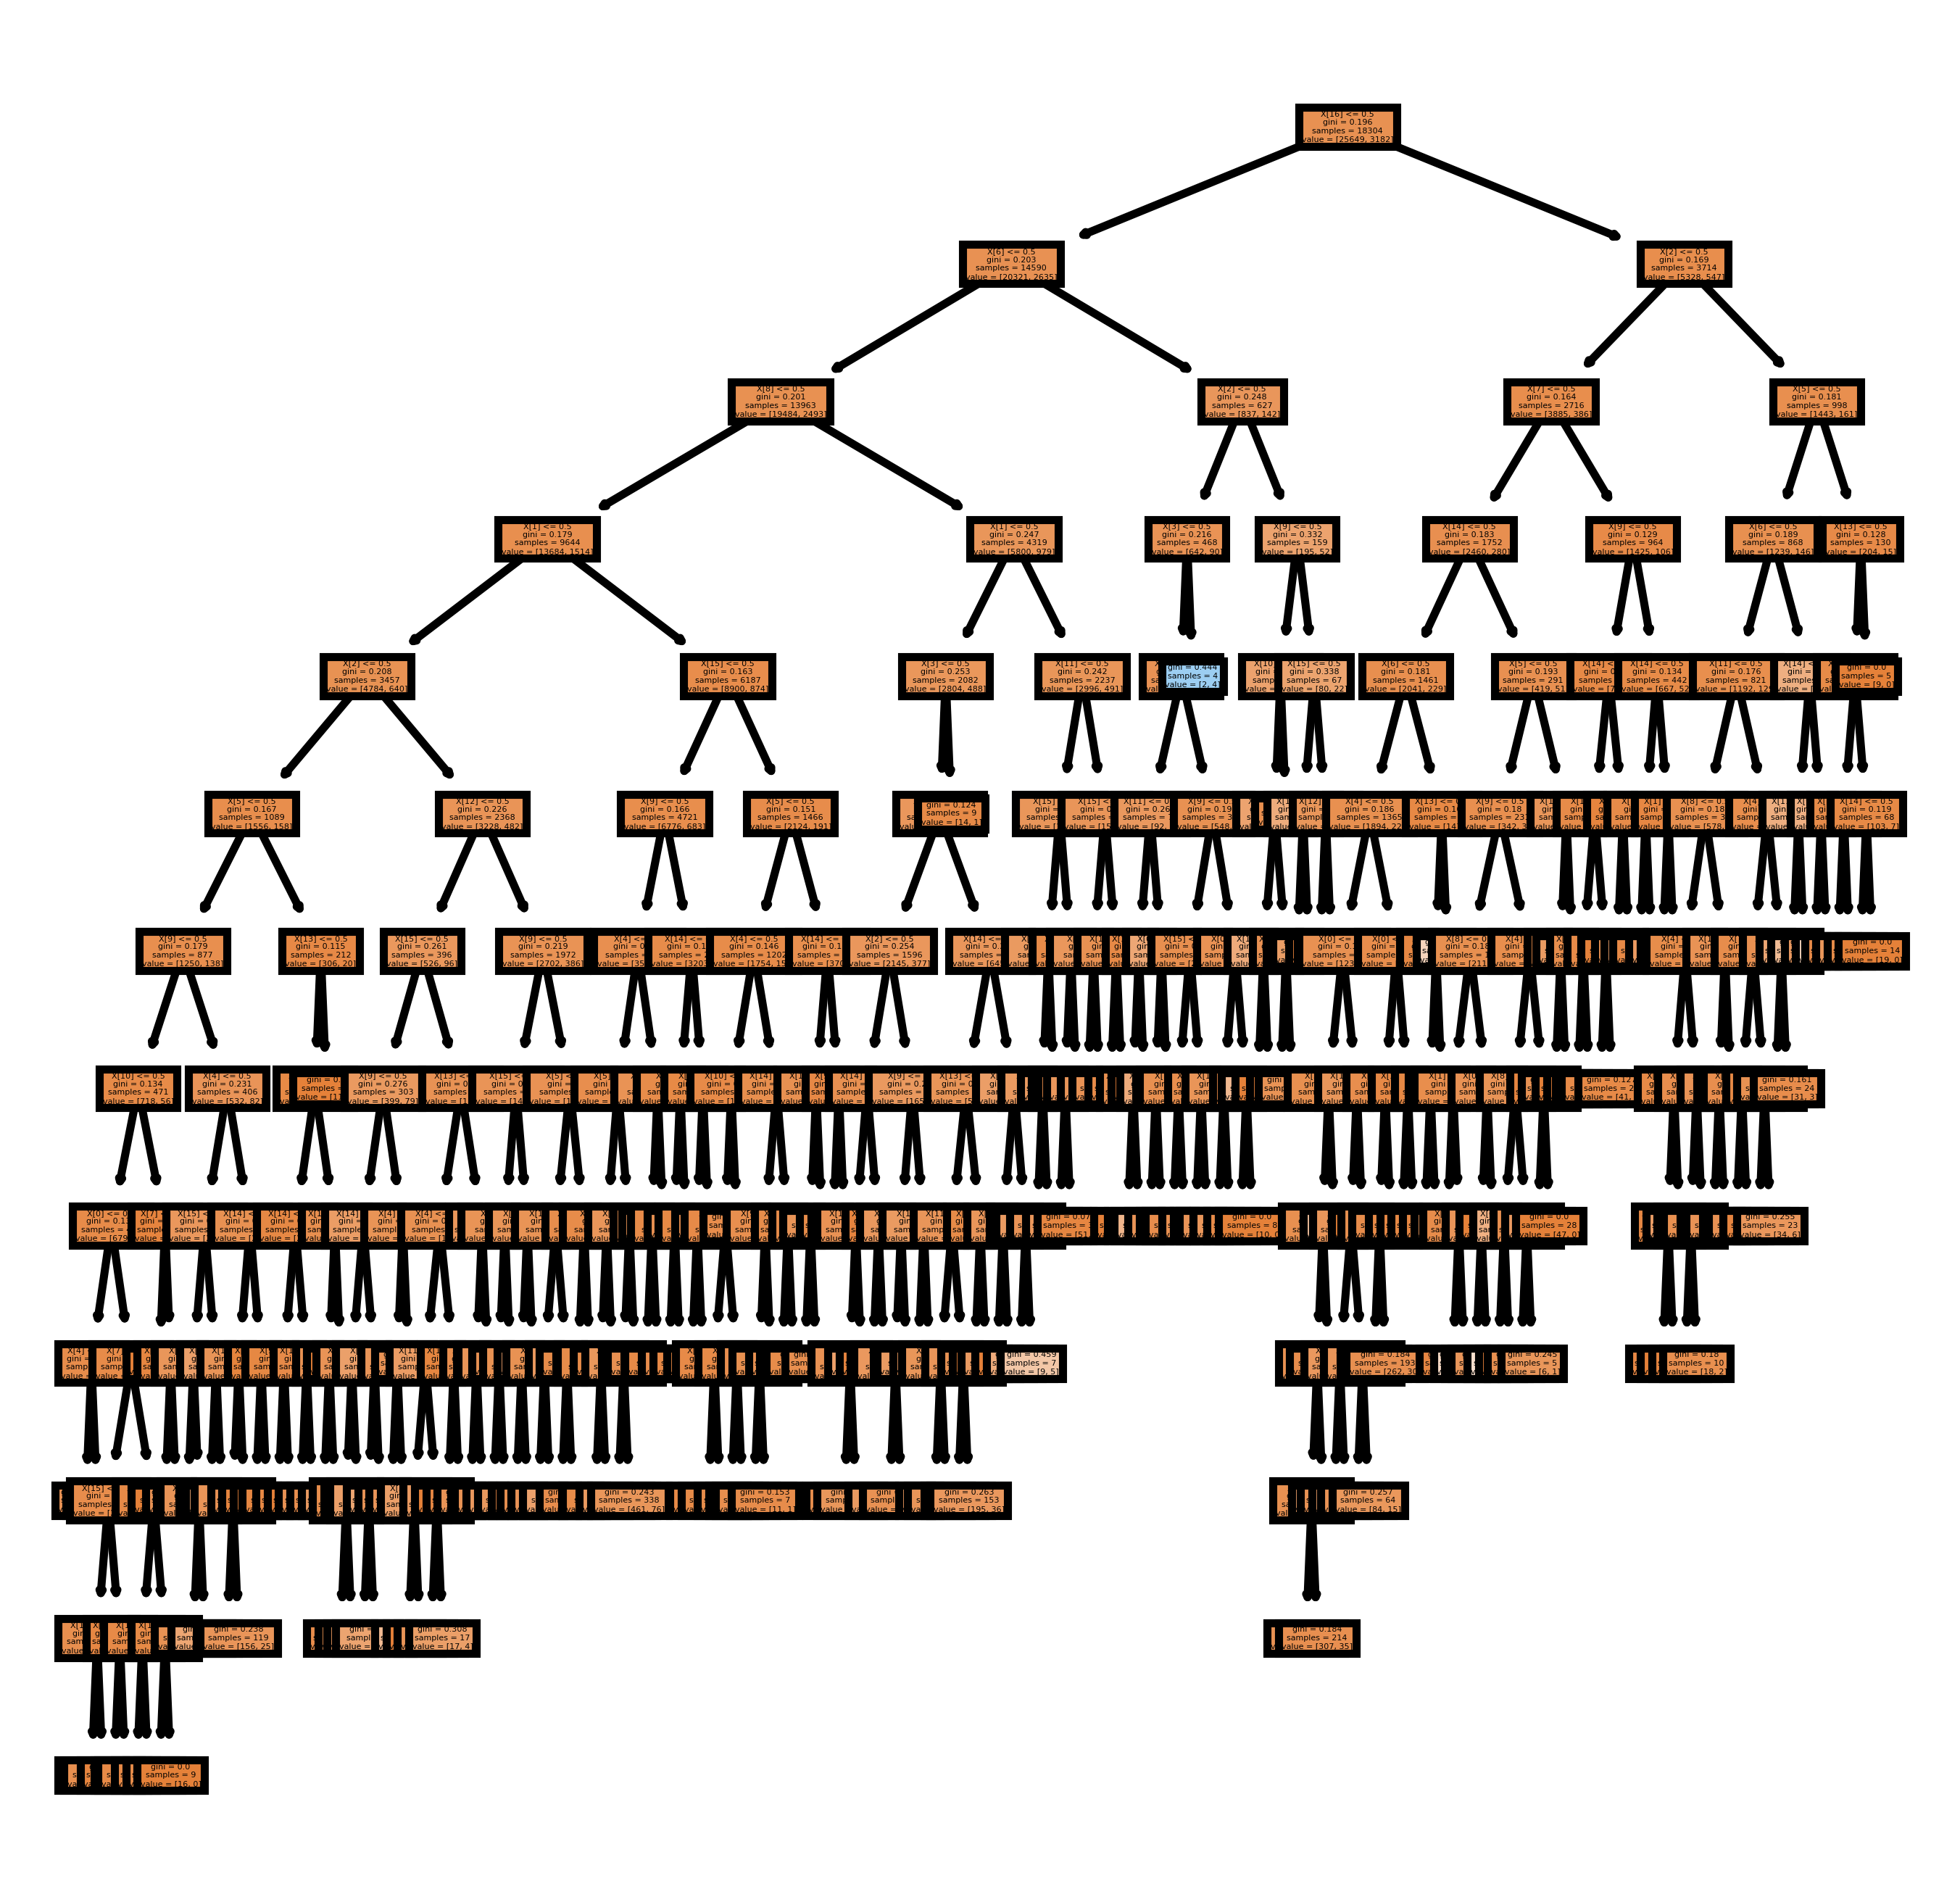

In [7]:
# Import the necessary packages:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import export_graphviz

# Plot the decision tree to create the visualisation:
fig, axes = plt.subplots(nrows = 1,
                         ncols = 1,
                         figsize = (4,4),
                         dpi=800)

tree.plot_tree(forest.estimators_[0],
               filled = True);

# Print and save the plot.
fig.savefig('rf_individualtree.png')  

# 

# Create a confusion matrix

<AxesSubplot:>

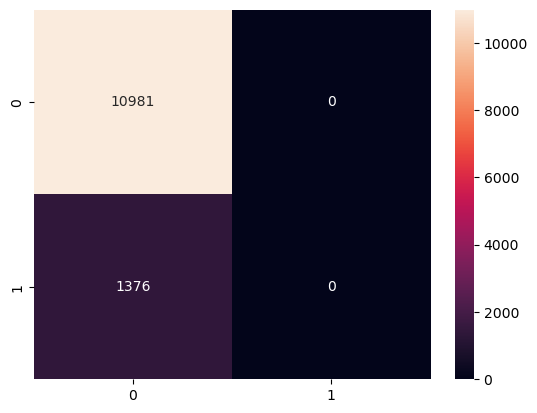

In [8]:
# Import the necessary libraries and packages.
import seaborn as sns
from sklearn.metrics import accuracy_score 

# Indicate the confusion matrix that needs to be created.
confusion_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion_matrix.
sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [9]:
# Create a DataFrame to display the confusion matrix. 
pd.DataFrame(confusion_matrix, index=['observed_notchurn','observed_churn'],
columns=['predicted_notchurn', 'predicted_churn'])

,predicted_notchurn,predicted_churn
observed_notchurn,10981,0
observed_churn,1376,0


# Accuracy of model

In [10]:
# Print a report on the model's accuracy.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10981
           1       0.00      0.00      0.00      1376

    accuracy                           0.89     12357
   macro avg       0.44      0.50      0.47     12357
weighted avg       0.79      0.89      0.84     12357



/Users/codyshan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/codyshan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/codyshan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Determine feature significance

Elapsed time to compute the importances: 0.055 seconds


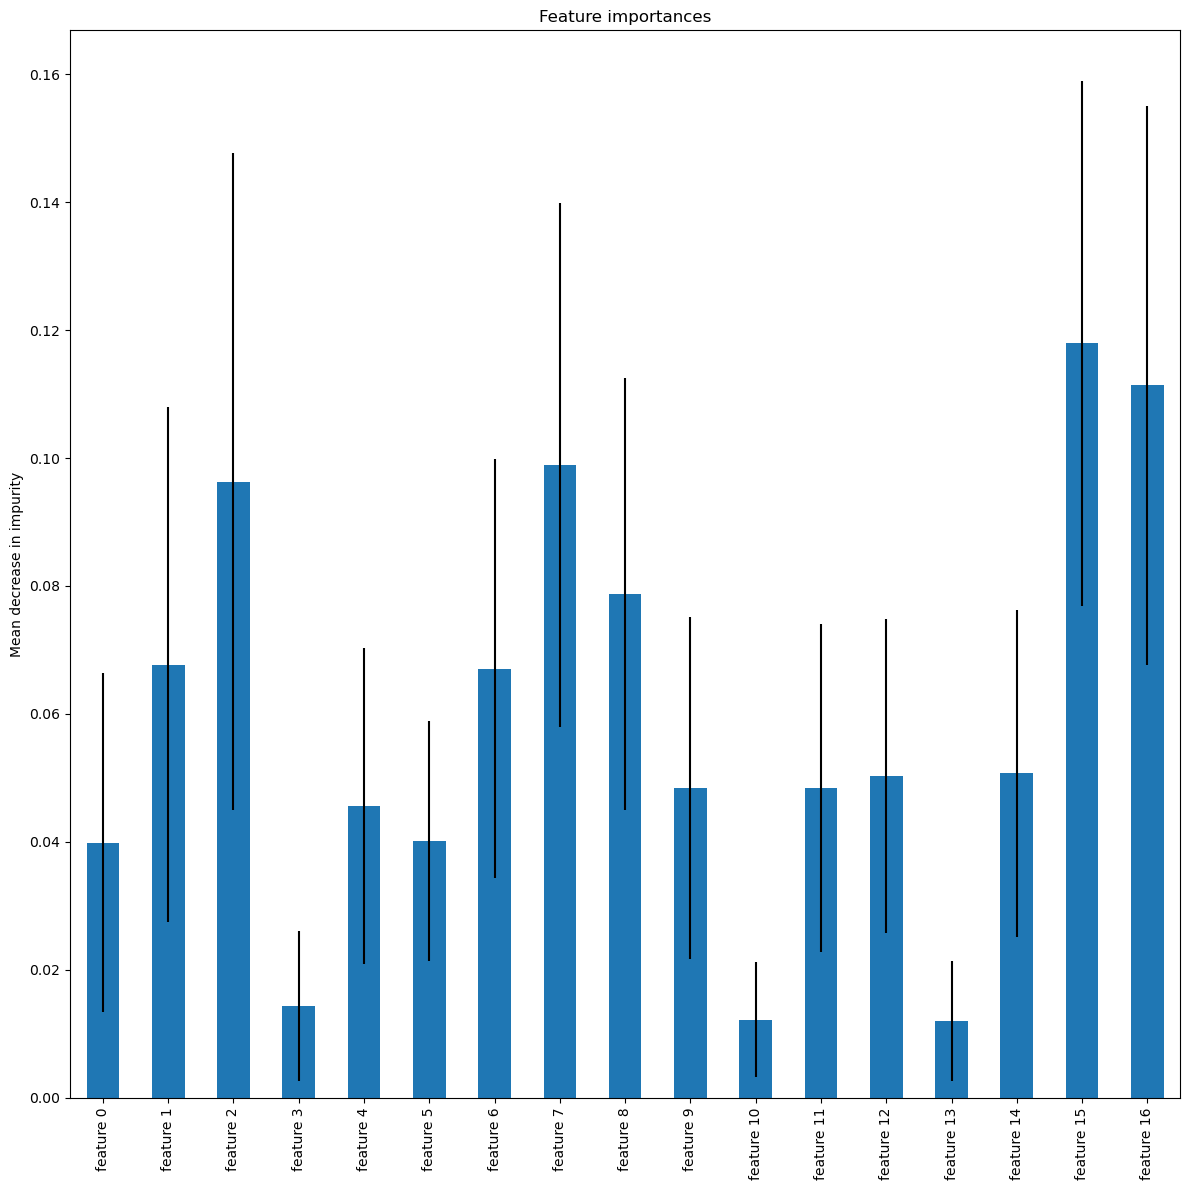

In [11]:
# Import the necessary packages.
import time

# Create a list of feature names.
feature_names = [f"feature {i}" for i in range(X_train.shape[1])]

# Start measuring the time required to construct the random forest mode.
start_time = time.time()

# Determine feature importance.
importances = forest.feature_importances_ 

# Summarise the feature importance.
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

# Calculate the elapsed time.
elapsed_time = time.time() - start_time  
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

# Create a data structure to store the importances.
forest_importances = pd.Series(importances, index=feature_names)

# Construct a bar graph.
fig, ax = plt.subplots(figsize=(12, 12))
forest_importances.plot.bar(yerr=std, ax=ax)

# Set the title for the graph.
ax.set_title("Feature importances")  

# Set the label for the y-axis.
ax.set_ylabel("Mean decrease in impurity") 

# Adjust padding between and around subplots.
fig.tight_layout() 